In [ ]:
Install python3.6 in windows "https://phoenixnap.com/kb/how-to-install-python-3-windows" 
Install python3.6 in ubuntu "http://ubuntuhandbook.org/index.php/2017/07/install-python-3-6-1-in-ubuntu-16-04-lts/"
Run this for installing packages time, numpy, pandas, sklearn, mpl_toolkits, seaborn, matplotlib: "pip3 install --user -r requirements.txt"

# LOAD MNIST DATA

In [68]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
get_ipython().magic(u'matplotlib inline')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set(font_scale=2)

In [69]:
mnist = fetch_mldata('MNIST original', transpose_data=True, data_home='./')
X = mnist.data / 255.0
y = mnist.target
print(X.shape, y.shape)

(70000, 784) (70000,)


In [70]:
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))
X, y = None, None
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 786)


In [71]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

<Figure size 432x288 with 0 Axes>

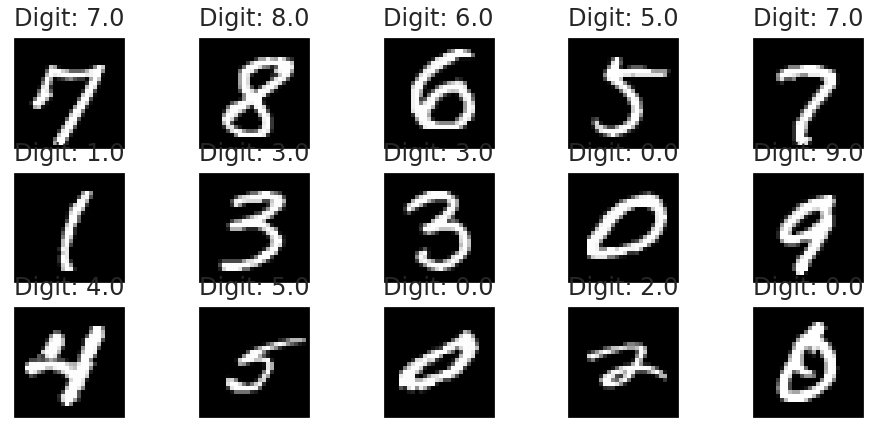

In [72]:
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'label'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
    ax.axes.get_xaxis().set_visible(False) 
    ax.axes.get_yaxis().set_visible(False) 
plt.show()

# PCA

In [73]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.09746116 0.07155445 0.06149531]


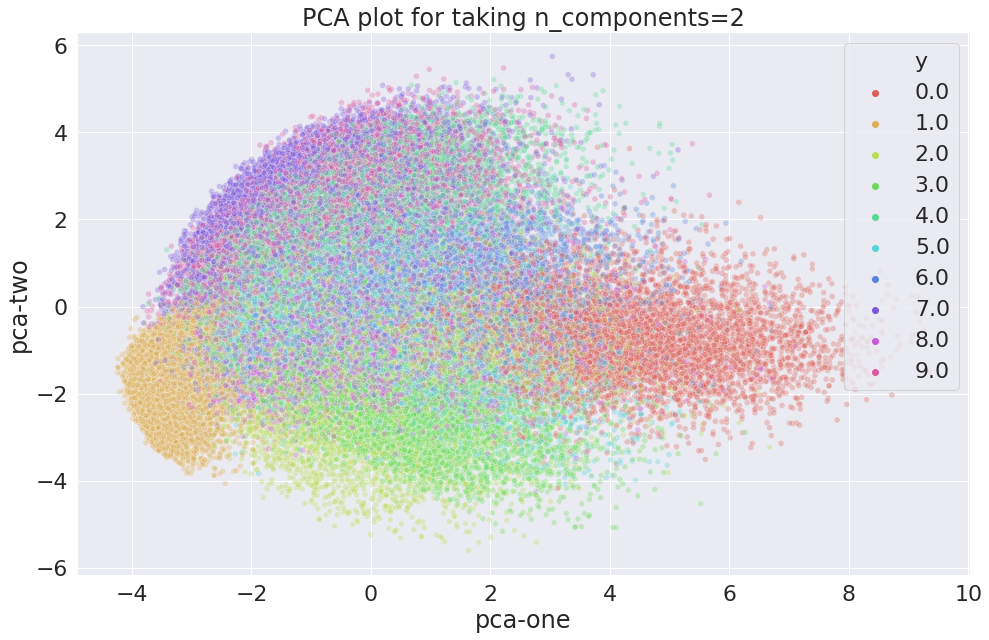

In [74]:
plt.figure(figsize=(16,10))

ax=sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
).set_title('PCA plot for taking n_components=2')

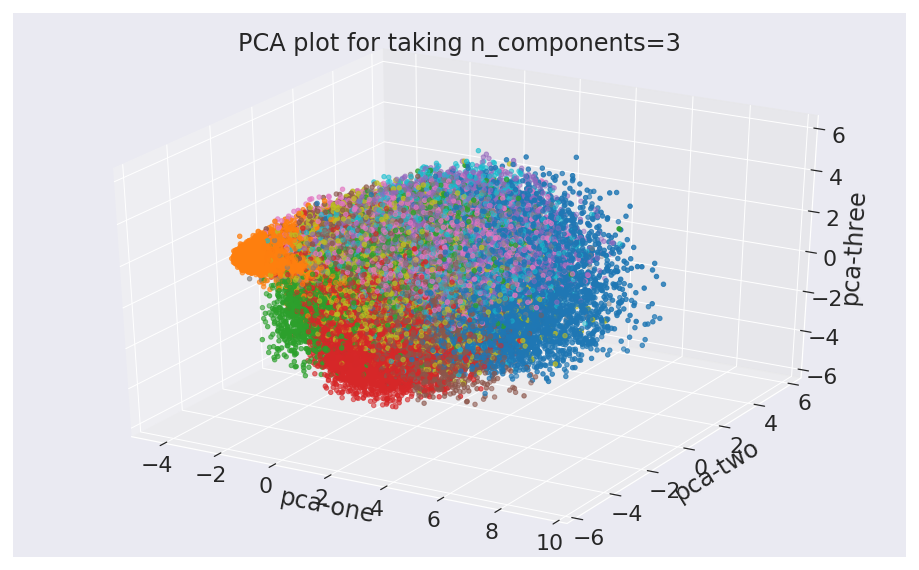

In [75]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:]["y"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
ax.set_title('PCA plot for taking n_components=3')
plt.show()


# PCA WITH 10000 SAMPLES

In [76]:
N = 10000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values

df_test_subset = df.loc[rndperm[N:N+5000],:].copy()
data_test_subset = df_test_subset[feat_cols].values

In [77]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.09730166 0.07135901 0.06183721]


# T-SNE plots for embedding PCA projections in 2D

In [78]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.434s...
[t-SNE] Computed neighbors for 10000 samples in 98.160s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.129023
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.956673
[t-SNE] Error after 300 iterations: 2.823406
t-SNE done! Time elapsed: 148.48

Text(0.5,1,'T-SNE embedding for PCA taking n_components=3')

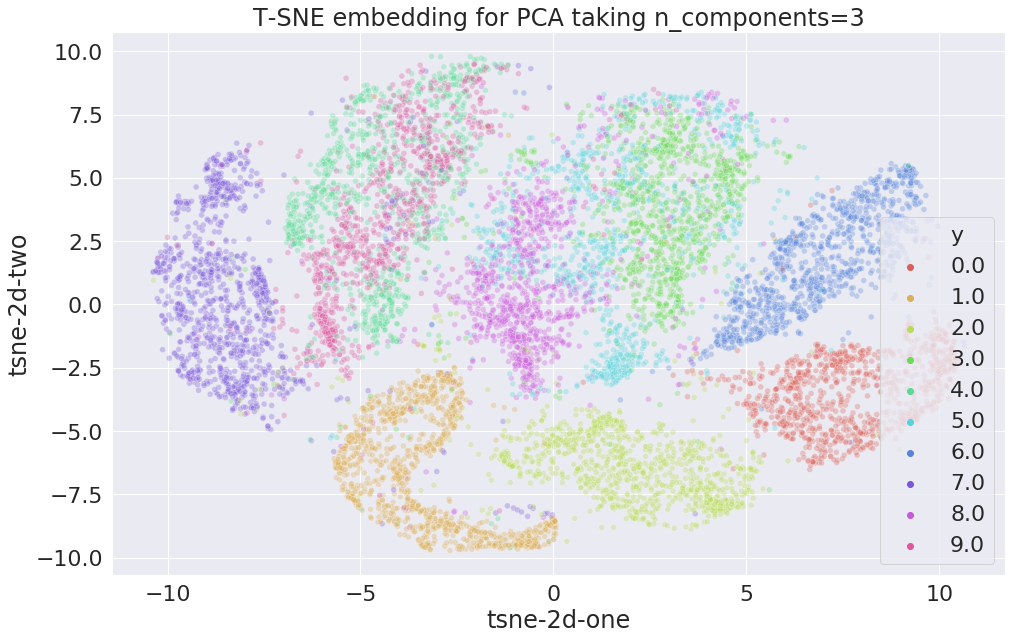

In [79]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3).set_title('T-SNE embedding for PCA taking n_components=3')

# Comparison between the vanilla PCA_2 and T-SNE of PCA_2

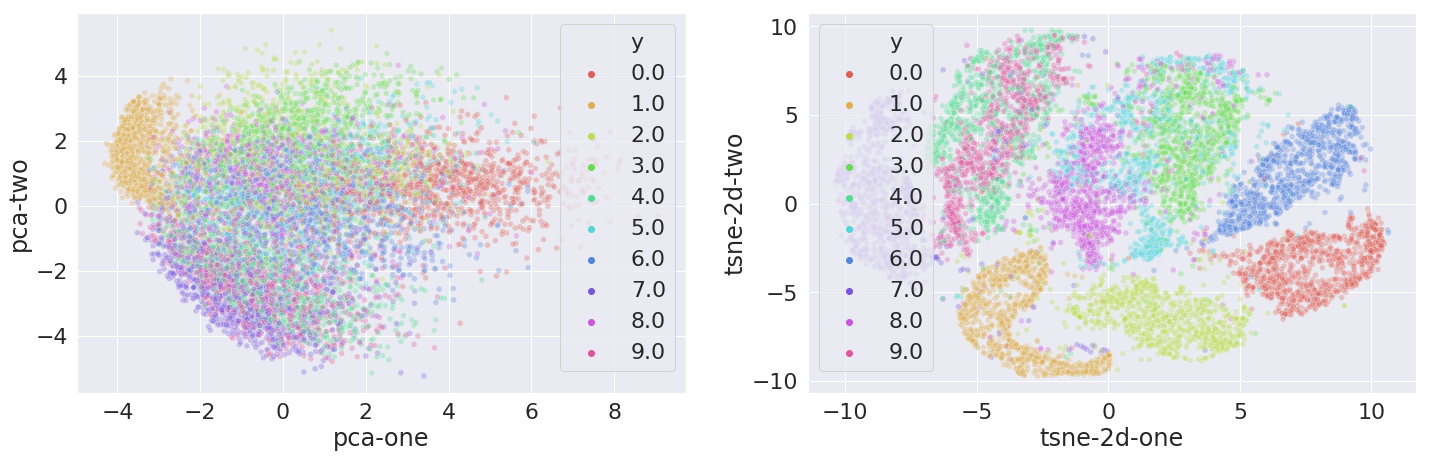

In [80]:
plt.figure(figsize=(24,7))
plt.title('Comparison between the vanilla PCA_2 and T-SNE of PCA_2')
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

# Comparison between the vanilla PCA_2 and T-SNE of PCA_2 and T-SNE of PCA_50

In [81]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(data_subset)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.8267553211494857


In [82]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


t-SNE done! Time elapsed: 50.67627930641174 seconds


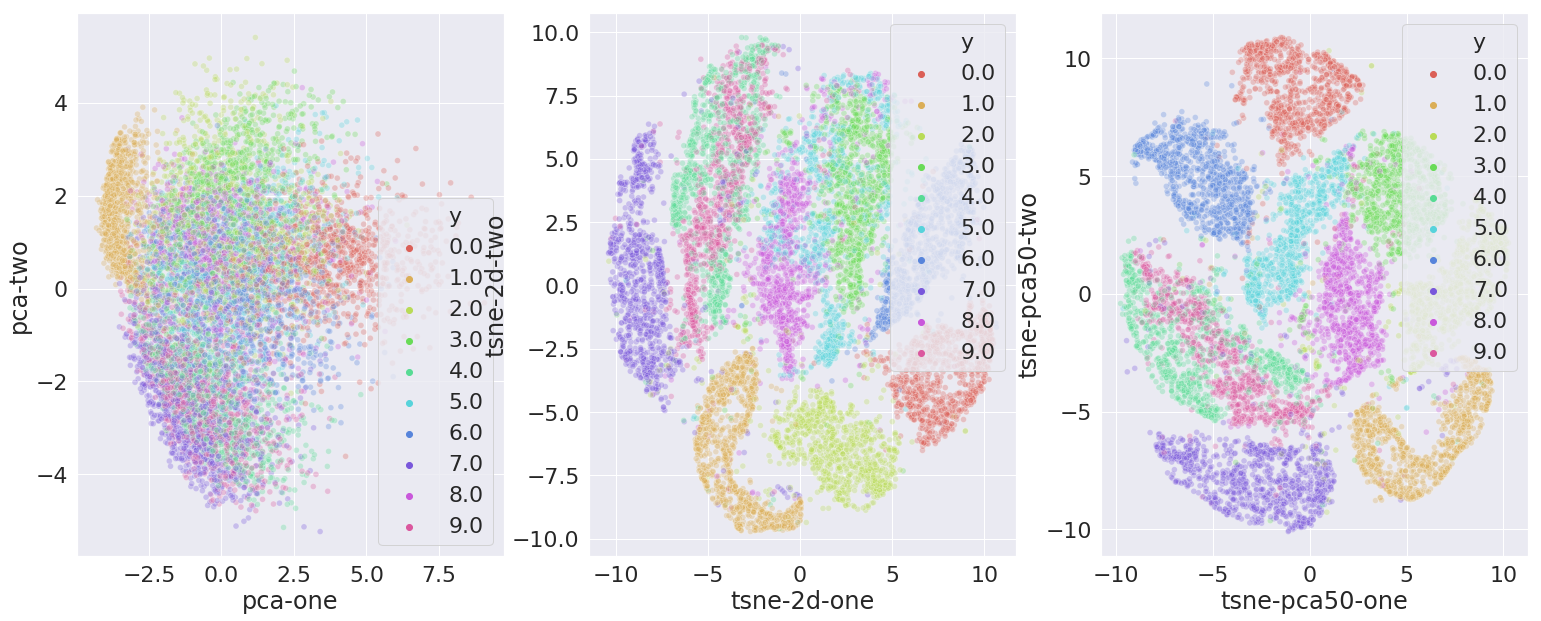

In [83]:
df_subset['tsne-pca50-one'] = tsne_pca_results[:,0]
df_subset['tsne-pca50-two'] = tsne_pca_results[:,1]
plt.figure(figsize=(26,10))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax3
)

# LDA with 2 components

In [84]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
lda_result = lda.fit_transform(data_subset,df_subset['label'].values)
df_subset['lda-2-one'] = lda_result[:,0]
df_subset['lda-2-two'] = lda_result[:,1]

/home/deepakanand/fastai/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


# Comparison between the vanilla PCA_2 and vanilla LDA_2

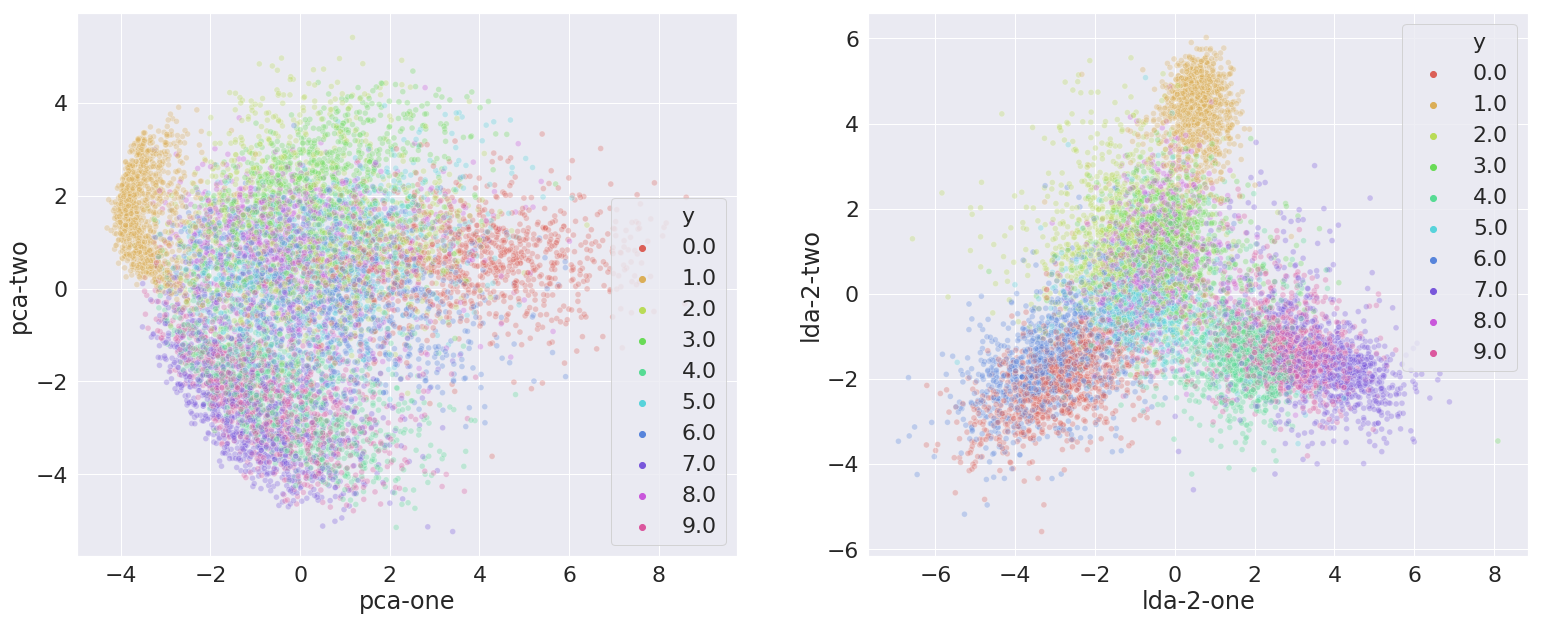

In [85]:
plt.figure(figsize=(26,10))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="lda-2-one", y="lda-2-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

# LDA with 50 components

In [86]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda_50 = LDA(n_components=50)
lda_50_result = lda_50.fit_transform(data_subset,df_subset['label'].values)
df_subset['lda-50-one'] = lda_result[:,0]
df_subset['lda-50-two'] = lda_result[:,1]

/home/deepakanand/fastai/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Accuracy 0.8584


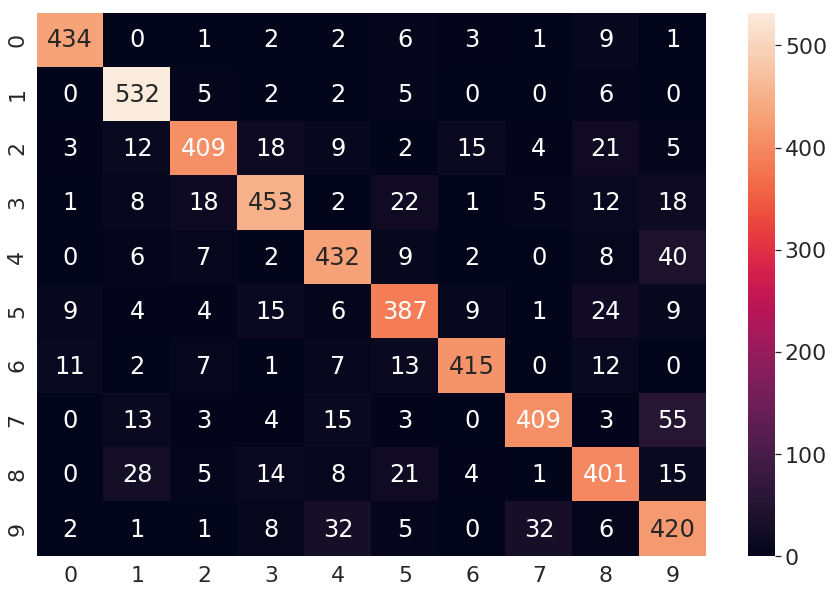

In [87]:
lda_50_clf_result = lda_50.predict(data_test_subset)
df_test_subset['lda_50'] = lda_50_clf_result
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(df_test_subset['label'].values, df_test_subset['lda_50'].values)
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (15,10))
sns.heatmap(df_cm, annot=True,fmt='g')
print("Accuracy",accuracy_score(df_test_subset['label'].values, df_test_subset['lda_50'].values, normalize=True, sample_weight=None))

In [48]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_lda_results = tsne.fit_transform(lda_50_result)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 46.576045751571655 seconds


# Comparison between T-SNE of PCA_50 and T-SNE of LDA_50

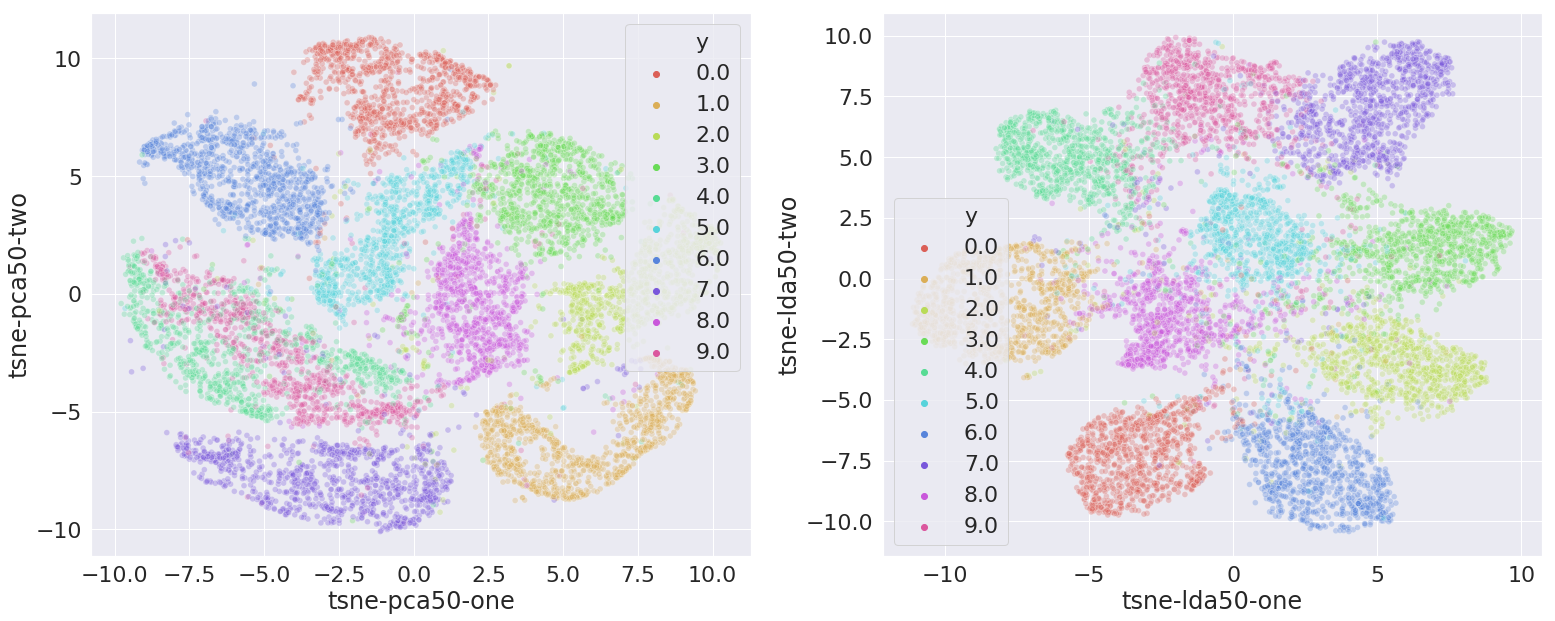

In [88]:
df_subset['tsne-lda50-one'] = tsne_lda_results[:,0]
df_subset['tsne-lda50-two'] = tsne_lda_results[:,1]
plt.figure(figsize=(26,10))
ax1 = plt.subplot(1, 2, 1)

sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-lda50-one", y="tsne-lda50-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

# QDA

In [89]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
qda = QDA()
qda_result = qda.fit(data_subset,df_subset['label'].values).predict(data_test_subset)
df_test_subset['qda'] = qda_result

/home/deepakanand/fastai/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/deepakanand/fastai/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/deepakanand/fastai/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/deepakanand/fastai/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/deepakanand/fastai/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/deepakanand/fastai/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("

Accuracy 0.619


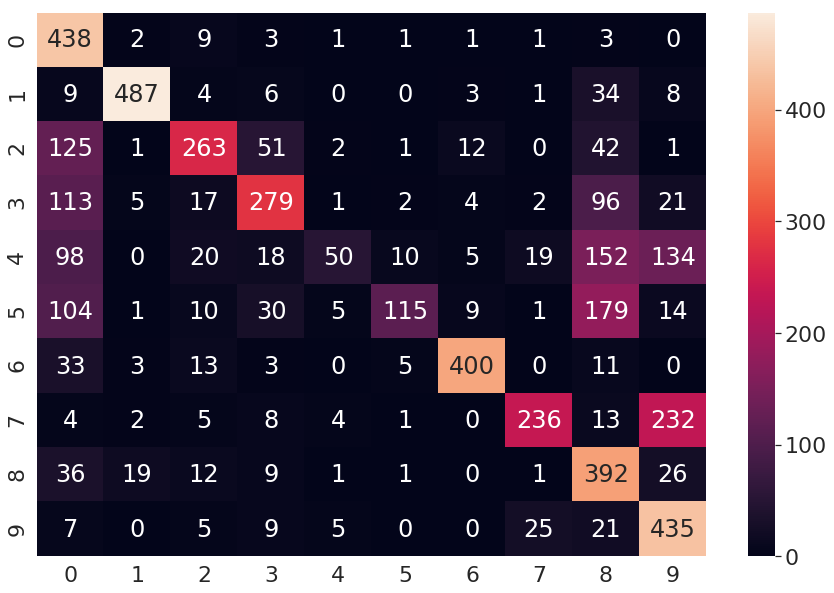

In [90]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(df_test_subset['label'].values, df_test_subset['qda'].values)
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (15,10))
sns.heatmap(df_cm, annot=True,fmt='g')
print("Accuracy",accuracy_score(df_test_subset['label'].values, df_test_subset['qda'].values, normalize=True, sample_weight=None))

# Linear SVM

In [91]:
from sklearn.svm import SVC
linear_svm = SVC(kernel="linear", C=0.025)
linear_svm_result = linear_svm.fit(data_subset,df_subset['label'].values).predict(data_test_subset)
df_test_subset['linear_svm'] = linear_svm_result

Accuracy 0.9332


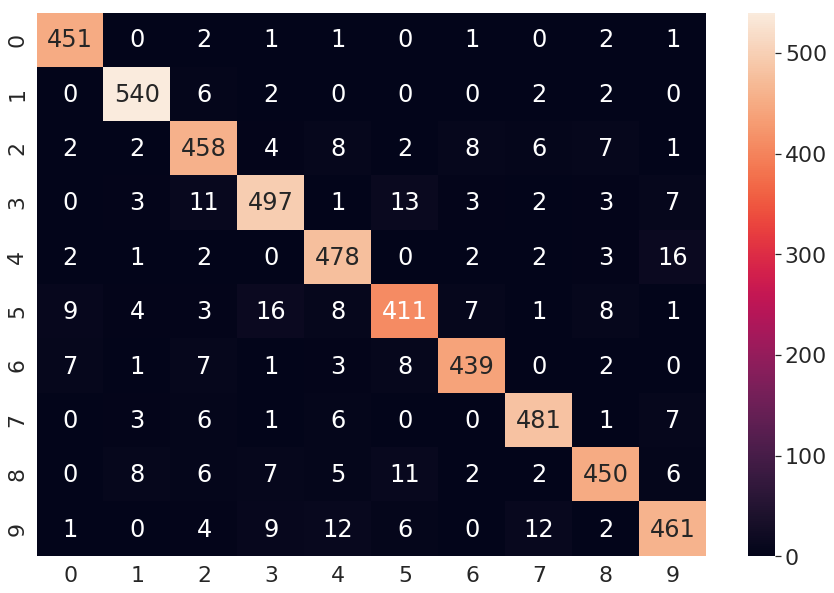

In [92]:
cm = confusion_matrix(df_test_subset['label'].values, df_test_subset['linear_svm'].values)
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (15,10))
sns.heatmap(df_cm, annot=True,fmt='g')
print("Accuracy",accuracy_score(df_test_subset['label'].values, df_test_subset['linear_svm'].values, normalize=True, sample_weight=None))

In [100]:
nlinear_svm = SVC(gamma=2, C=1,kernel = 'poly')
nlinear_svm_result = nlinear_svm.fit(data_subset,df_subset['label'].values).predict(data_test_subset)
df_test_subset['nlinear_svm'] = nlinear_svm_result

Accuracy 0.9568


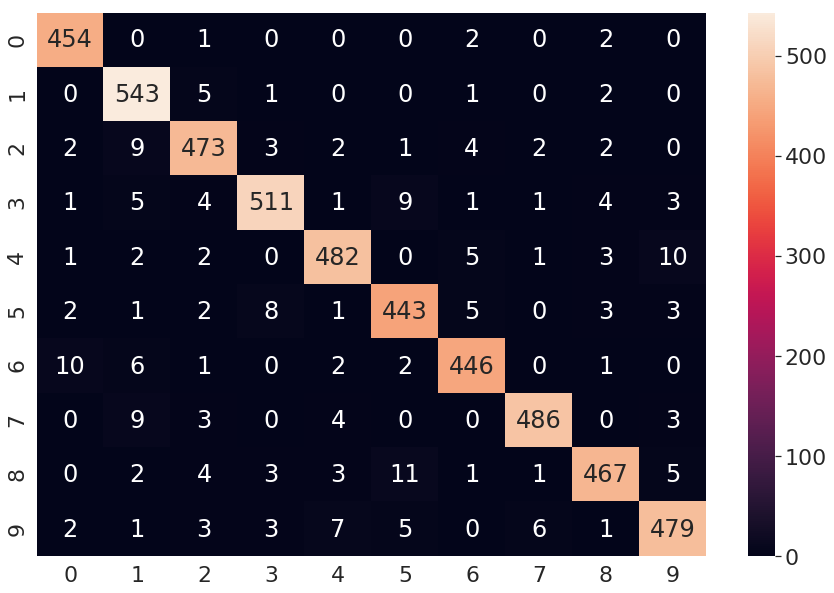

In [101]:
cm = confusion_matrix(df_test_subset['label'].values, df_test_subset['nlinear_svm'].values)
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (15,10))
sns.heatmap(df_cm, annot=True,fmt='g')
print("Accuracy",accuracy_score(df_test_subset['label'].values, df_test_subset['nlinear_svm'].values, normalize=True, sample_weight=None))

In [125]:
from sklearn import linear_model
log_reg_linear = linear_model.SGDClassifier(max_iter=100000, tol=1e-25,loss='log')
log_reg_linear_result = log_reg_linear.fit(data_subset,df_subset['label'].values).predict(data_test_subset)
df_test_subset['log_reg_linear'] = log_reg_linear_result

Accuracy 0.893


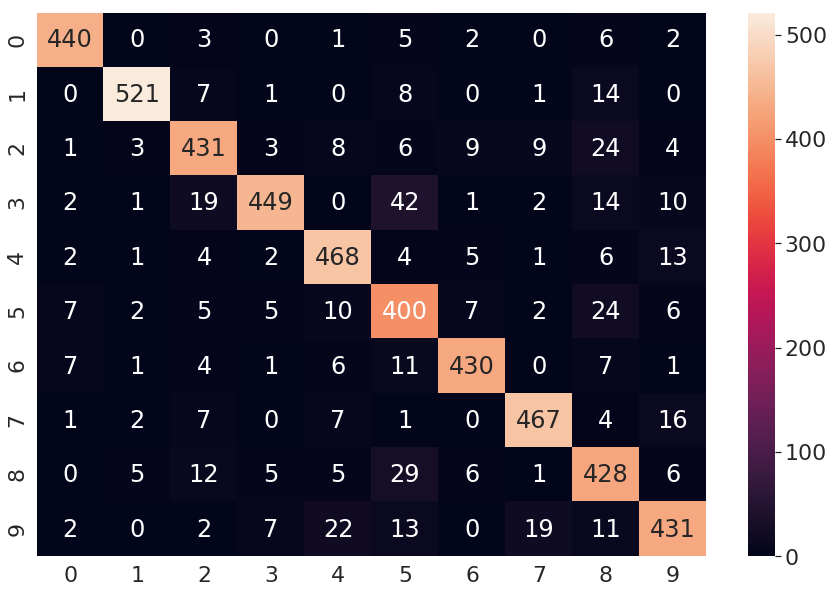

In [126]:
cm = confusion_matrix(df_test_subset['label'].values, df_test_subset['log_reg_linear'].values)
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (15,10))
sns.heatmap(df_cm, annot=True,fmt='g')
print("Accuracy",accuracy_score(df_test_subset['label'].values, df_test_subset['log_reg_linear'].values, normalize=True, sample_weight=None))